## True Car -  Exploratory Data Analysis

### Technocolabs Internship Project April 2022

**Task Details : To Perform EDA(Exploratory Data Analysis)**

**By Mukul Dev Mahato**

***

### Step 1 : Reading and Understanding the Data.

1. Importing necessary libraries.
2. Importing the dataset.
3. Understanding the structure of the data.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
df1 = pd.read_csv("tc20171021.csv", error_bad_lines=False, warn_bad_lines=False)
df2 = pd.read_csv("true_car_listings.csv")

In [46]:
df1.tail()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
1216245,1233038,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
1216246,1233039,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
1216247,1233040,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
1216248,1233041,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
1216249,1233042,60240,2017,8342,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [47]:
df2

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [108]:
#concatenating df1 and df2
df = pd.concat([df1, df2]).reset_index()

In [110]:
df.drop(['index', 'Id'], axis = 1, inplace =True)

In [111]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
2068367,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
2068368,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
2068369,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
2068370,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


### Step 2 : Checking for Null values.

In [112]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

There are no null values present in the dataset. The data is clean.

### Step 3 : Checking for Duplicate values

In [113]:
#Number of duplicates
df.duplicated().sum()

539156

In [114]:
#Lets drop the duplicates

df.drop_duplicates(inplace=True)

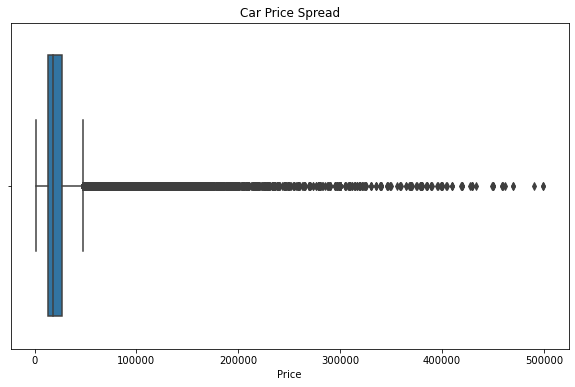

In [119]:
plt.figure(figsize=(10,6))

plt.title('Car Price Spread')
sns.boxplot(x=df.Price)

plt.show()

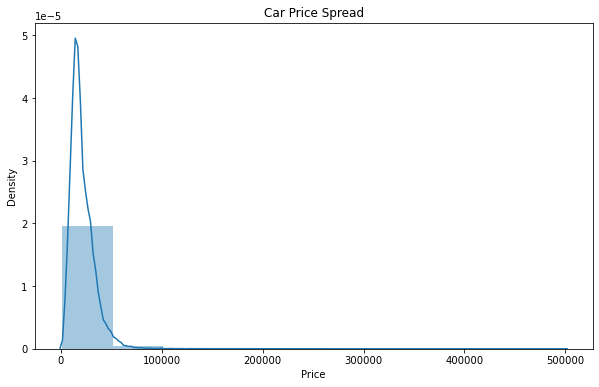

In [118]:
plt.figure(figsize=(10,6))

plt.title('Car Price Spread')
sns.distplot(df.Price, bins =10)

plt.show()

## Step 4 : Handling the outliers

In [120]:
df['Price'].describe()

count    1.529216e+06
mean     2.132126e+04
std      1.325448e+04
min      1.500000e+03
25%      1.315000e+04
50%      1.841900e+04
75%      2.697800e+04
max      4.995000e+05
Name: Price, dtype: float64

In [121]:
df['Price'].quantile(0.25)

13150.0

In [122]:
df['Price'].quantile(0.75)

26978.0

In [123]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [124]:
IQR

13828.0

In [125]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [126]:
lower_lim

-7592.0

In [127]:
upper_lim

47720.0

In [128]:
outlier_low = df['Price'] < lower_lim

In [129]:
outlier_high = df['Price'] > upper_lim

In [130]:
len(df['Price']) - len(df['Price'][outlier_low]) + len(df['Price'][outlier_high])

1579767

In [131]:
df['Price'][(outlier_low | outlier_high)]

582         47835
583        111500
669         59497
671         47999
672         53993
            ...  
2068364     53855
2068366     54995
2068367     63215
2068370     60240
2068371     76995
Name: Price, Length: 50551, dtype: int64

In [132]:
df['Price'][~ (outlier_low | outlier_high)]

0          16472
1          15749
2          16998
3          15777
4          16784
           ...  
2068302    35900
2068320    30995
2068358    45280
2068361    46500
2068362    46530
Name: Price, Length: 1478665, dtype: int64

In [133]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
2068364,53855,2017,7530,Marietta,GA,YV1A22MK3H1004002,Volvo,S90T6
2068366,54995,2017,2474,Berwyn,PA,YV1A22MK1H1010445,Volvo,S90T6
2068367,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
2068370,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [134]:
df = df[~ (outlier_low | outlier_high)]

In [135]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
2068302,35900,2015,26956,East Petersburg,PA,YV4902RB2F2621371,Volvo,XC60T6
2068320,30995,2014,392123,Berwyn,PA,YV4902DZ8E2543908,Volvo,XC60T6
2068358,45280,2017,8,San Leandro,CA,YV140MEK1H1370375,Volvo,V60T5
2068361,46500,2017,8,San Leandro,CA,YV140MEM3H1370217,Volvo,V60T5


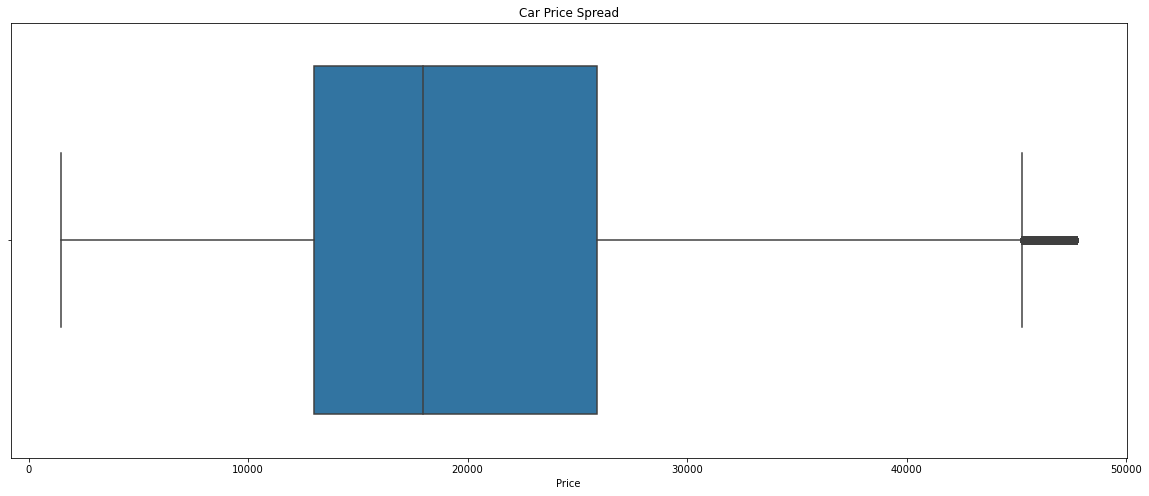

In [137]:
plt.figure(figsize=(20,8))

plt.title('Car Price Spread')
sns.boxplot(x=df.Price)

plt.show()

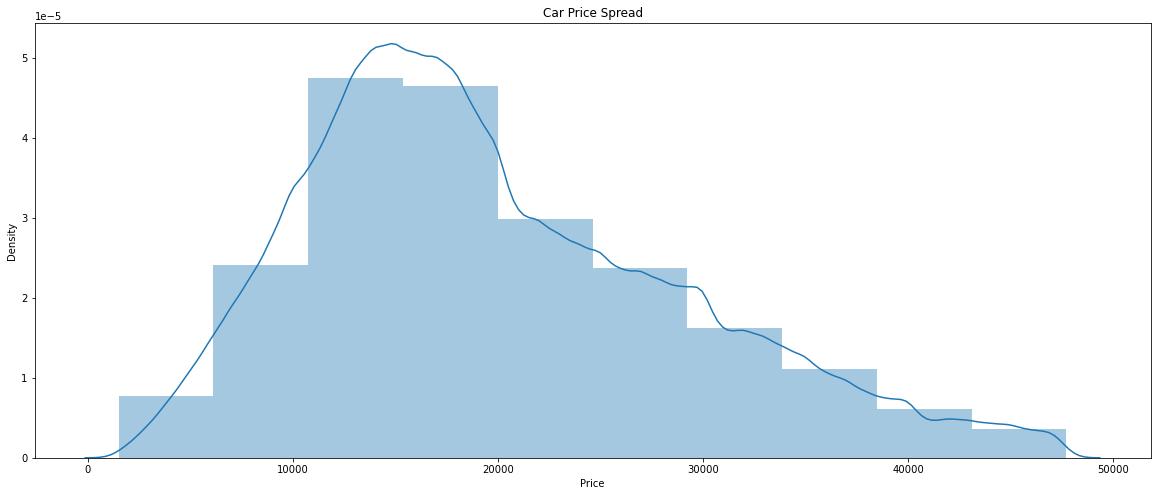

In [138]:
plt.figure(figsize=(20,8))

plt.title('Car Price Spread')
sns.distplot(df.Price, bins =10)

plt.show()

Now after handling the outliers present.Lets visualize

In [139]:
df_new = pd.DataFrame(df.groupby(['Make'])['Price'].mean().sort_values(ascending = False))

In [140]:
df_new =  df_new.reset_index().rename(columns = {'Make' : 'Company Name','Price' : 'Average Price'})

In [141]:
df_new

,Company Name,Average Price
0,AM,43863.333333
1,Tesla,43736.077778
2,Aston,43412.900000
3,Fisker,42443.529412
4,Bentley,42146.065217
5,Alfa,41157.500000
6,Genesis,40422.189427
7,Lotus,39168.076923
8,Maserati,38896.017822
9,Porsche,30315.851360


## Top 10 Companies Vs Their Average Price

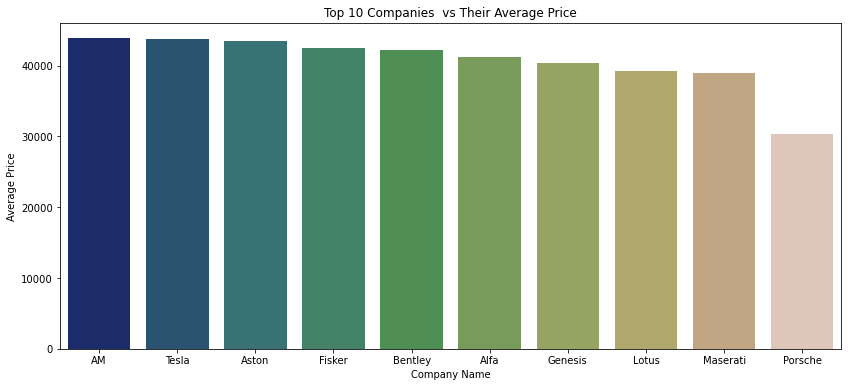

In [142]:
plt.figure(figsize=(14, 6))

ax = sns.barplot(x = df_new['Company Name'][:10],y = df_new['Average Price'],palette = 'gist_earth')
plt.title('Top 10 Companies  vs Their Average Price')
plt.show()

In [143]:
bmw = df[df['Make']=='BMW']

In [145]:
bmw.Model.unique()

array(['3', 'X1sDrive28i', 'i3Hatchback', '5', 'X3AWD', 'X1xDrive35i',
       'X3xDrive28i', 'X5AWD', '7', 'X1xDrive', 'X1xDrive28i', '4',
       'X3sDrive28i', 'X4xDrive28i', 'X5xDrive35i', 'X5', 'X5xDrive35d',
       '6', '2', 'i394', 'M32dr', 'X3xDrive35i', 'X6xDrive35i',
       'X5xDrive50i', 'M34dr', 'M3Coupe', 'X6xDrive50i', 'X6sDrive35i',
       'X5sDrive35i', 'X6AWD', 'M5Sedan', 'Z4sDrive28i', 'M4Coupe',
       'Z4Roadster', 'Z4sDrive35i', 'M3Convertible', '1', 'Z3Z3',
       'X3xDrive28d', 'Z4Z4', 'M6M6', 'X6', 'Z4sDrive35is', 'M3M3',
       'Z42dr', 'M54dr', 'Z3Roadster', 'X1Sports', 'M6Convertible',
       'M62dr', 'X4xDrive35i', 'Z3Coupe', '8', 'X1AWD', 'X4xDriveM40i',
       'Z4Coupe', 'X535i'], dtype=object)